<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_22_SoftmaxClassificationMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import transforms,datasets
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [37]:
# Plot the data
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [41]:
#create and print training dataset
train_dataset = datasets.MNIST(root = '../mnist_data',train = True,download = True,transform = transforms.ToTensor())
print(train_dataset)

Extracting ../mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw



Extracting ../mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw
Processing...
Done!
Dataset MNIST
    Number of datapoints: 60000
    Root location: ../mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [44]:
#create and print the validation dataset
validation_dataset = datasets.MNIST(root = '../mnist_data',train = False, download = True,transform = transforms.ToTensor())
validation_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../mnist_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [45]:
#print the size of the iamge
train_dataset[0][0].shape

torch.Size([1, 28, 28])

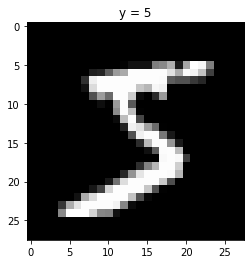

In [47]:
#print the image
show_data(train_dataset[0])

In [48]:
#print the label for the image
train_dataset[0][1]

5

In [55]:
#build SoftMax Classifier
class SoftMaxModel(nn.Module):
  def __init__(self,input_size,output_size):
    super(SoftMaxModel,self).__init__()
    self.linear = nn.Linear(in_features = input_size,out_features = output_size)
  def forward(self,x):
    return self.linear(x)


In [56]:
#set input and output dimensions
input_dim = 1 * 28 * 28
output_dim = 10

In [58]:
#create the model and print it
model = SoftMaxModel(input_dim,output_dim)
model

SoftMaxModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [65]:
#print the parameters
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0165, -0.0180,  0.0012,  ...,  0.0084, -0.0192, -0.0034],
                      [ 0.0103, -0.0131,  0.0128,  ...,  0.0253, -0.0088, -0.0200],
                      [-0.0347, -0.0339, -0.0123,  ..., -0.0286, -0.0319,  0.0007],
                      ...,
                      [-0.0246,  0.0321,  0.0312,  ...,  0.0186,  0.0088, -0.0219],
                      [ 0.0091,  0.0044,  0.0213,  ...,  0.0195, -0.0078,  0.0090],
                      [ 0.0357,  0.0107,  0.0261,  ..., -0.0097, -0.0077,  0.0179]])),
             ('linear.bias',
              tensor([-0.0148, -0.0126,  0.0076,  0.0087, -0.0253, -0.0315,  0.0311, -0.0052,
                       0.0129, -0.0301]))])

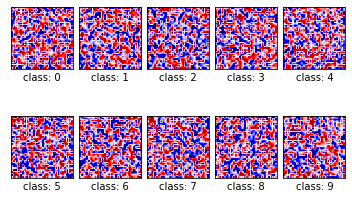

In [67]:
#plot the parametes
PlotParameters(model)

In [68]:
#define optimizer,criterion,dataloader
optimizer = optim.SGD(model.parameters(),lr = 0.1)
criterion = nn.CrossEntropyLoss()
trainloader = DataLoader(dataset = train_dataset,batch_size = 100)
validationloader = DataLoader(dataset = validation_dataset, batch_size = 5000)

In [75]:
EPOCHS = 50
LOSS = []
ACCURACY = []
N = len(validation_dataset)
def train_model(EPOCHS):
  for epoch in range(EPOCHS):
    for x,y in trainloader:
      z = model(x.view(-1,1*28*28)) #row tensor 
      loss = criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    correct = 0
    for x_test,y_test in validationloader:
      z_test = model(x_test.view(-1,1*28*28))
      _,y_pred = torch.max(z_test.data,1)
      correct += (y_pred == y_test).sum().item()
    accuracy = correct / N
    LOSS.append(loss.item())
    ACCURACY.append(accuracy)
    print('Epoch {} Loss {}'.format(epoch,loss.item()))


In [76]:
train_model(EPOCHS)

Epoch 0 Loss 0.28542494773864746
Epoch 1 Loss 0.283704936504364
Epoch 2 Loss 0.28207823634147644
Epoch 3 Loss 0.2805340886116028
Epoch 4 Loss 0.27906352281570435
Epoch 5 Loss 0.2776589095592499
Epoch 6 Loss 0.2763136923313141
Epoch 7 Loss 0.2750224173069
Epoch 8 Loss 0.2737801671028137
Epoch 9 Loss 0.2725825309753418
Epoch 10 Loss 0.27142634987831116
Epoch 11 Loss 0.27030810713768005
Epoch 12 Loss 0.2692249119281769
Epoch 13 Loss 0.26817455887794495
Epoch 14 Loss 0.26715466380119324
Epoch 15 Loss 0.26616352796554565
Epoch 16 Loss 0.2651992738246918
Epoch 17 Loss 0.2642602324485779
Epoch 18 Loss 0.26334521174430847
Epoch 19 Loss 0.26245275139808655
Epoch 20 Loss 0.26158201694488525
Epoch 21 Loss 0.26073166728019714
Epoch 22 Loss 0.25990086793899536
Epoch 23 Loss 0.2590886354446411
Epoch 24 Loss 0.2582944631576538
Epoch 25 Loss 0.25751709938049316
Epoch 26 Loss 0.25675639510154724
Epoch 27 Loss 0.25601157546043396
Epoch 28 Loss 0.25528180599212646
Epoch 29 Loss 0.2545667588710785
Epoch 3

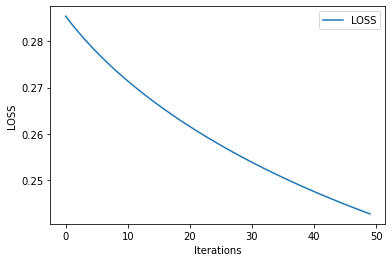

In [81]:
#plot loss and accuracy
plt.plot(LOSS,label='LOSS')
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.legend()
plt.show()

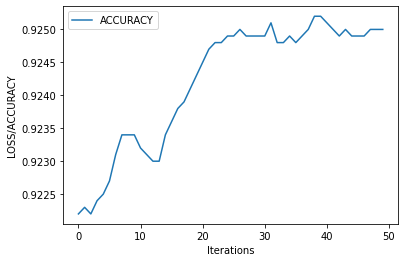

In [79]:
plt.plot(ACCURACY,label='ACCURACY')
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

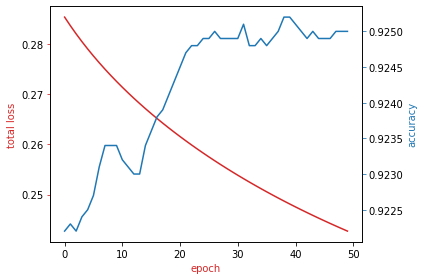

In [78]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(LOSS,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( ACCURACY, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

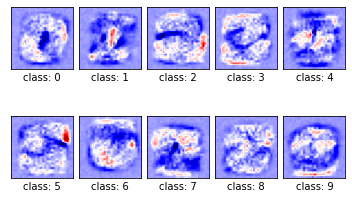

In [82]:
#plot the parameters after training
PlotParameters(model)

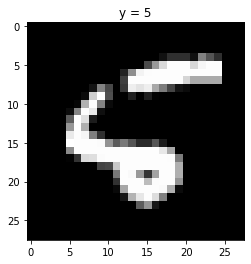

y_pred: tensor([6])
probability of class  0.9982373714447021


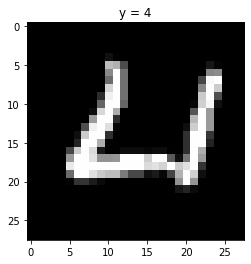

y_pred: tensor([6])
probability of class  0.5128852128982544


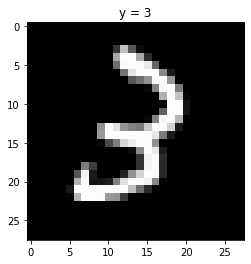

y_pred: tensor([2])
probability of class  0.7826613187789917


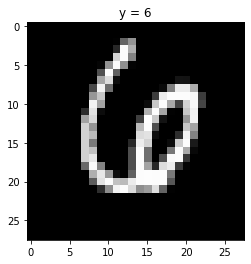

y_pred: tensor([7])
probability of class  0.3413101136684418


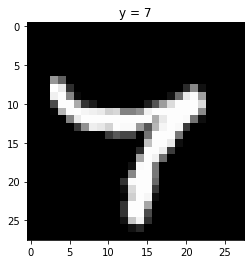

y_pred: tensor([4])
probability of class  0.6139193177223206


In [86]:
# plot the misclassified samples
softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.view(-1, 28 * 28))
    _, y_pred = torch.max(z.data, 1)
    if y_pred != y:
        show_data((x, y))
        plt.show()
        print("y_pred:", y_pred)
        print("probability of class ", torch.max(softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

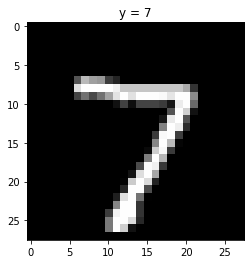

y_pred: tensor([7])
probability of class  0.9972865581512451


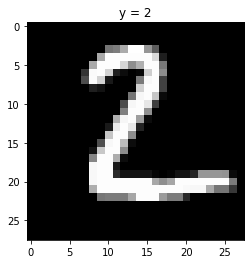

y_pred: tensor([2])
probability of class  0.9853748083114624


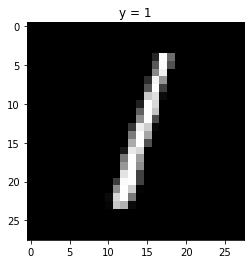

y_pred: tensor([1])
probability of class  0.9801274538040161


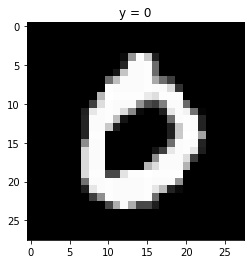

y_pred: tensor([0])
probability of class  0.9998912811279297


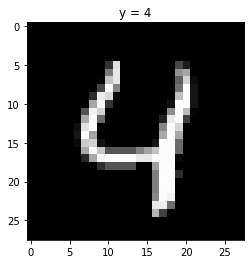

y_pred: tensor([4])
probability of class  0.9657783508300781


In [89]:
# plot the correctly classified samples
softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.view(-1, 28 * 28))
    _, y_pred = torch.max(z.data, 1)
    if y_pred == y:
        show_data((x, y))
        plt.show()
        print("y_pred:", y_pred)
        print("probability of class ", torch.max(softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       